In [26]:
import json
import typing as tp

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from matplotlib.figure import Figure


class YouTube2:
    def __init__( # task0
        self,
        trends_df_path: str="RUvideos_short.csv",
        categories_df_path: str="RU_category_id.json"
    ):

        self.trends_df = pd.read_csv(trends_df_path, parse_dates=["trending_date"])
        #self.categories_df = pd.read_csv(categories_df_path)
    
        self.trends_df.trending_date = pd.to_datetime(self.trends_df.trending_date, format='%y.%d.%m')
        
        with open(categories_df_path) as json_file:
            json_data = json.load(json_file)
          
        self.categories_df = pd.DataFrame(columns=['id', 'name'])

        for item in json_data['items']:
            self.categories_df = self.categories_df.append(
              {'id': int(item['id']),
              'name': item['snippet']['title']},
              ignore_index=True
          )
          
        self.categories_df['id'] = self.categories_df['id'].astype(int)


    def task1(self) -> pd.DataFrame:
        return pd.merge(self.trends_df, self.categories_df, left_on = "category_id", right_on = "id")
    
    def task2(self) -> pd.DataFrame:
        df = self.task1().copy()
        df.trending_date = df.trending_date.apply(lambda data: data.day)
        piv = pd.pivot_table(df, values = "views", index = "name",aggfunc=sum, columns = ["trending_date"])
        return piv
    def task3(self) -> Figure:
        sns.set(font_scale=1.3)
        f, ax = plt.subplots(figsize=(12, 7))
        sns.heatmap(self.task2()/1e6, annot=True, ax=ax, cmap="viridis", robust=True)
        plt.title("Veiws")
        return f

    def task4(self) -> pd.DataFrame:
        df = self.task1().copy()
        df.trending_date = df.trending_date.apply(lambda data: data.day)
        table = pd.pivot_table(
            df, 
            values = "views", 
            index = "name",
            aggfunc=sum, 
            columns = ["trending_date"], 
            margins=True, 
            margins_name = "Всего просмотров")
        return table

    def task5(self) -> Figure:
        sns.set(font_scale=1.3)
        f, ax = plt.subplots(figsize=(12, 7))
        sns.heatmap(self.task4()/1e6, 
                    annot=True, 
                    ax=ax, 
                    robust = True)
        plt.title("Veiws")
        return plt.gcf()

In [27]:
y = YouTube2()

/tmp/ipykernel_3483/1813827168.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.categories_df = self.categories_df.append(
/tmp/ipykernel_3483/1813827168.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.categories_df = self.categories_df.append(
/tmp/ipykernel_3483/1813827168.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.categories_df = self.categories_df.append(
/tmp/ipykernel_3483/1813827168.py:31: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  self.categories_df = self.categories_df.append(
/tmp/ipykernel_3483/1813827168.py:31: FutureWarning: The frame.append method is deprecated and will be removed from 

In [28]:
y.task1().columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'id', 'name'],
      dtype='object')

In [29]:
y.task2()

trending_date,14,15,16,17,18,19,20,21
name,,,,,,,,
Autos & Vehicles,1350890.0,2076443.0,2051608.0,1386676.0,1713087.0,1736740.0,962761.0,1421017.0
Comedy,2310887.0,4152389.0,4156893.0,3556025.0,3806238.0,3556578.0,5648120.0,4627423.0
Education,139723.0,28850.0,6963.0,146943.0,256076.0,310830.0,270585.0,186909.0
Entertainment,5010384.0,5289490.0,3373346.0,12299938.0,7519942.0,5877590.0,8174020.0,4585563.0
Film & Animation,636616.0,931837.0,1160112.0,1820958.0,2725012.0,1075440.0,2574276.0,2532978.0
Gaming,885597.0,1609621.0,1583149.0,557074.0,600307.0,193316.0,851814.0,981217.0
Howto & Style,2191619.0,1562421.0,129763.0,1250164.0,1468139.0,156958.0,1402284.0,350009.0
Music,733907.0,1585619.0,4720464.0,9179397.0,6972429.0,1329904.0,1527219.0,809274.0
News & Politics,1010044.0,1225112.0,1174092.0,1251367.0,1056007.0,1028665.0,657263.0,1214178.0


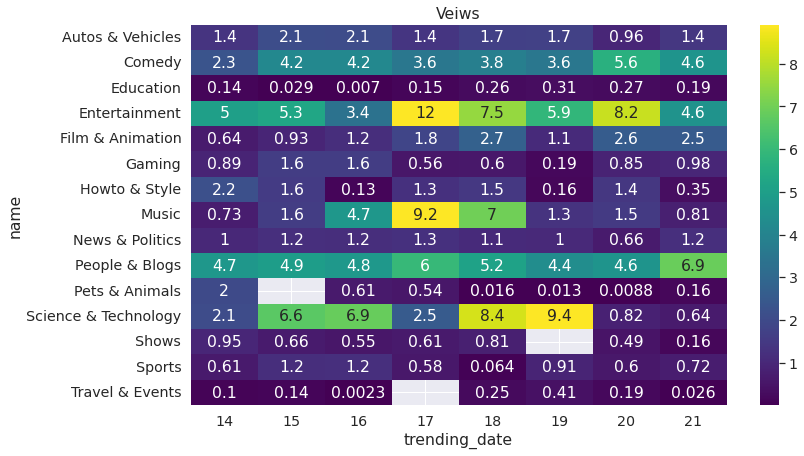

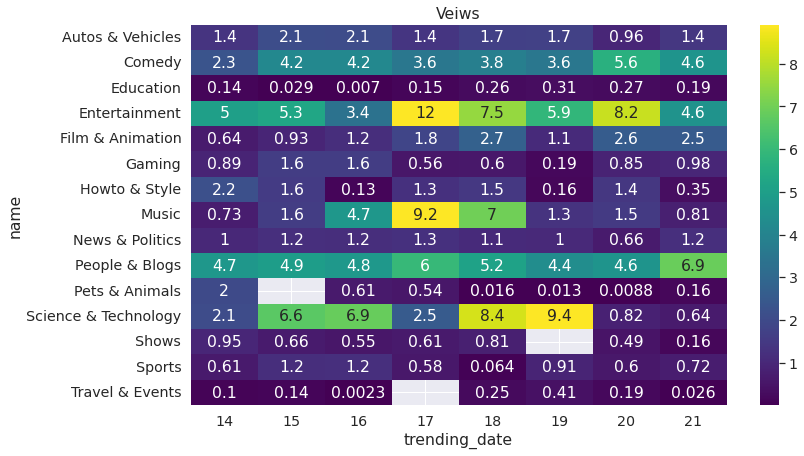

In [30]:
y.task3()

In [31]:
y.task4()

trending_date,14,15,16,17,18,19,20,21,Всего просмотров
name,,,,,,,,,
Autos & Vehicles,1350890.0,2076443.0,2051608.0,1386676.0,1713087.0,1736740.0,962761.0,1421017.0,12699222
Comedy,2310887.0,4152389.0,4156893.0,3556025.0,3806238.0,3556578.0,5648120.0,4627423.0,31814553
Education,139723.0,28850.0,6963.0,146943.0,256076.0,310830.0,270585.0,186909.0,1346879
Entertainment,5010384.0,5289490.0,3373346.0,12299938.0,7519942.0,5877590.0,8174020.0,4585563.0,52130273
Film & Animation,636616.0,931837.0,1160112.0,1820958.0,2725012.0,1075440.0,2574276.0,2532978.0,13457229
Gaming,885597.0,1609621.0,1583149.0,557074.0,600307.0,193316.0,851814.0,981217.0,7262095
Howto & Style,2191619.0,1562421.0,129763.0,1250164.0,1468139.0,156958.0,1402284.0,350009.0,8511357
Music,733907.0,1585619.0,4720464.0,9179397.0,6972429.0,1329904.0,1527219.0,809274.0,26858213
News & Politics,1010044.0,1225112.0,1174092.0,1251367.0,1056007.0,1028665.0,657263.0,1214178.0,8616728


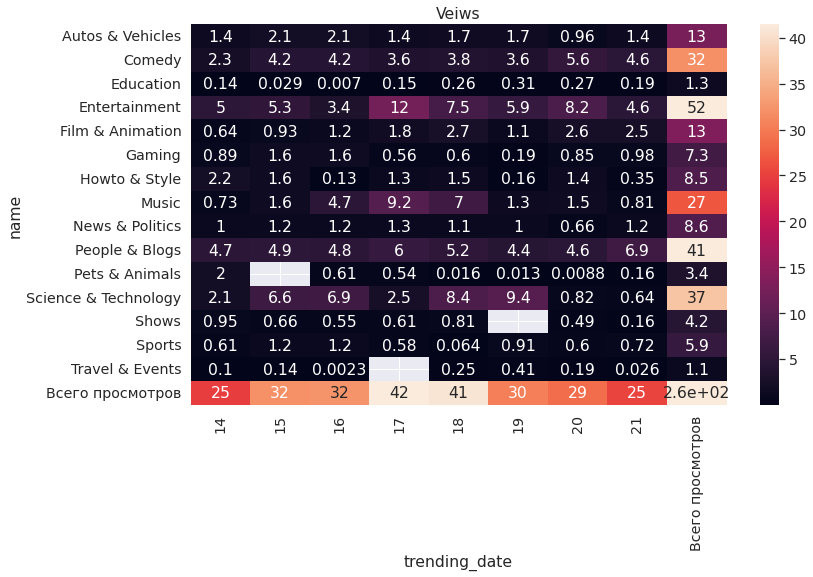

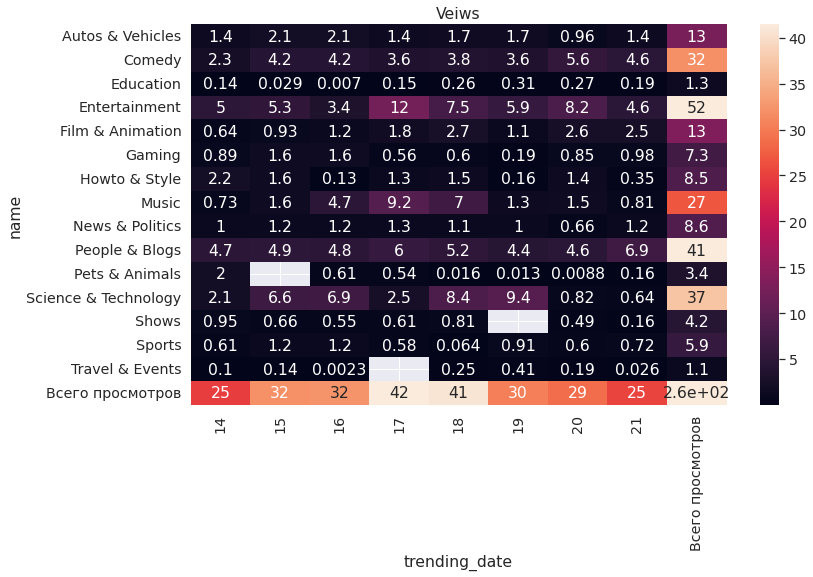

In [32]:
y.task5()